In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
with open ('org_data/ClimateData.txt', 'r') as file1:
    lines=file1.readlines()
    time=[]
    time_e = []
    time_e_ph = []
    temp=[]
    co2=[]
    sea_ice_ext=[]
    pH=[]
    for i in lines:
        fulllines=i.split('\t')
        time.append(fulllines[0])
        temp.append(fulllines[2])
        co2.append(fulllines[1])
        sea_ice_ext.append(fulllines[4])
        pH.append(fulllines[5].replace("\n", ""))

time_e.append(2023)
time_e.append(2044)
time_e_ph.append(2020.7)
time_e_ph.append(2044)

#replace empty values in pH data with NaN (because pH data is missing values)
pH_n=[]
for string in (pH):
    if string == '':
        string = np.nan
    pH_n.append(string)

#add point in the future

#convert data entries from strings to floats
times = [float(string) for string in time]
times_e = [float(string) for string in time_e]
co2s=[float(string) for string in co2]
temps = [float(string) for string in temp]
phs = [float(string) for string in pH_n]
sea_ice_exts = [float(string) for string in sea_ice_ext]

In [3]:
#Load in annual data
#then convert columns to lists to have a list of each type of data
with open ('org_data/ClimateDataAnnual.txt', 'r') as file2:
    lines2=file2.readlines()
    time_y=[]
    temp_y=[]
    co2_y=[]
    sea_ice_ext_y=[]
    for i in lines2:
        fulllines=i.split('\t')
        time_y.append(fulllines[0])
        temp_y.append(fulllines[2])
        co2_y.append(fulllines[1])
        sea_ice_ext_y.append(fulllines[4])


#convert data entries from strings to floats
times_y = [float(string) for string in time_y]
co2s_y=[float(string) for string in co2_y]
temps_y = [float(string) for string in temp_y]
sea_ice_exts_y = [float(string) for string in sea_ice_ext_y]

In [4]:
# load in interpolated pH data
with open ('org_data/pHData.txt', 'r') as file3:
    lines3 = file3.readlines()
    time_int = []
    ph_int = []
    for i in lines3:
        fulllines=i.split('\t')
        time_int.append(fulllines[0])
        ph_int.append(fulllines[1])


time_int = [float(string) for string in time_int]
ph_int = [float(string) for string in ph_int]

# load in interpolated yearly pH data
with open ('org_data/pHDataAnnual.txt', 'r') as file4:
    lines4 = file4.readlines()
    time_y_int = []
    ph_y_int = []
    for i in lines4:
        fulllines=i.split('\t')
        time_y_int.append(fulllines[0])
        ph_y_int.append(fulllines[1])


times_y_int = [float(string) for string in time_y_int]
phs_y_int = [float(string) for string in ph_y_int]


In [5]:
#convert data to np arrays to use polyfit

times_np = np.array(times)
times_e_np = np.array(times_e)
time_e_ph_np = np.array(time_e_ph)
time_int_np = np.array(time_int)
co2_np = np.array(co2s)
temp_np = np.array(temps)
sea_ice_ext_np = np.array(sea_ice_exts)
ph_np = np.array(ph_int)
times_y_np = np.array(times_y)
co2s_y_np = np.array(co2s_y)
temps_y_np = np.array(temps_y)
sea_ice_ext_y_np = np.array(sea_ice_exts_y)
times_y_int_np = np.array(times_y_int)
ph_y_np = np.array(phs_y_int)

In [6]:
#copy code from trends notebook
a, b = np.polyfit(times_np, co2_np, 1)
a2, b2 = np.polyfit(times_np[-180:],co2_np[-180:], 1)
a3, b3 = np.polyfit(times_np[:180],co2_np[:180], 1)

a_temp, b_temp = np.polyfit(times_np, temp_np, 1)
a2_temp, b2_temp = np.polyfit(times_np[-180:],temp_np[-180:], 1)
a3_temp, b3_temp = np.polyfit(times_np[:180],temp_np[:180], 1)

a_ice, b_ice = np.polyfit(times_np, sea_ice_ext_np, 1)
a2_ice, b2_ice = np.polyfit(times_np[340:-12],sea_ice_ext_np[340:-12], 1)
a3_ice, b3_ice = np.polyfit(times_np[:180],sea_ice_ext_np[:180], 1)

a_ph, b_ph = np.polyfit(time_int_np, ph_np, 1)
a2_ph, b2_ph = np.polyfit(time_int_np[-120:],ph_np[-120:], 1)
a3_ph, b3_ph = np.polyfit(time_int_np[:120],ph_np[:120], 1)

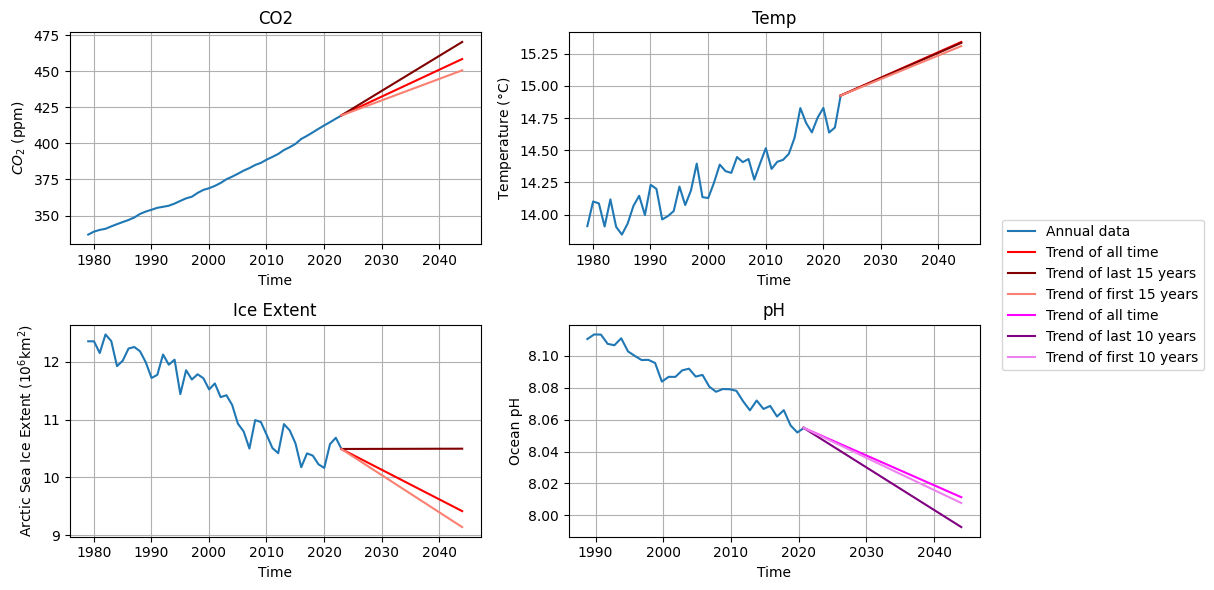

<Figure size 2000x1200 with 0 Axes>

In [9]:
# plot the yearly datasets with trends at the end starting at the last point of the dataset

fig, axs = plt.subplots(2, 2, figsize=(10,6))
plt.figure(figsize=(20,12))
axs[0, 0].plot(times_y,co2s_y_np, label = 'Annual data')
axs[0, 0].plot(times_e,a*times_e_np+(co2s_y_np[-1:]-a*2023), color='red', label='Trend of all time')
axs[0, 0].plot(times_e,a2*times_e_np+(co2s_y_np[-1:]-a2*2023),color='maroon', label = 'Trend of last 15 years')
axs[0, 0].plot(times_e,a3*times_e_np+(co2s_y_np[-1:]-a3*2023),color='salmon', label = 'Trend of first 15 years')
axs[0, 0].set_title('CO2')
axs[0, 0].set_ylabel('$CO_{2}$ (ppm)')
axs[0, 0].grid()

axs[0, 1].plot(times_y,temps_y_np)
axs[0, 1].plot(times_e,a_temp*times_e_np+(temps_y_np[-1:]-a_temp*2023), color='red')
axs[0, 1].plot(times_e,a2_temp*times_e_np+(temps_y_np[-1:]-a2_temp*2023),color='maroon')
axs[0, 1].plot(times_e,a3_temp*times_e_np+(temps_y_np[-1:]-a3_temp*2023),color='salmon')
axs[0, 1].set_title('Temp')
axs[0, 1].set_ylabel('Temperature ($\degree$C)')
axs[0, 1].grid()

axs[1, 0].plot(times_y,sea_ice_ext_y_np)
axs[1, 0].plot(times_e,a_ice*times_e_np+(sea_ice_ext_y_np[-1:]-a_ice*2023), color='red')
axs[1, 0].plot(times_e,a2_ice*times_e_np+(sea_ice_ext_y_np[-1:]-a2_ice*2023),color='maroon')
axs[1, 0].plot(times_e,a3_ice*times_e_np+(sea_ice_ext_y_np[-1:]-a3_ice*2023),color='salmon')
axs[1, 0].set_title('Ice Extent')
axs[1, 0].set_ylabel('Arctic Sea Ice Extent ($10^6$km$^2$)')
axs[1, 0].grid()

#axs[1, 1].plot(timeph,pH_np)
axs[1, 1].plot(times_y_int,ph_y_np)
axs[1, 1].plot(time_e_ph,a_ph*time_e_ph_np+(ph_y_np[-1:]-a_ph*2020.7), color='magenta', label='Trend of all time')
axs[1, 1].plot(time_e_ph,a2_ph*time_e_ph_np+(ph_y_np[-1:]-a2_ph*2020.7),color='purple', label = 'Trend of last 10 years')
axs[1, 1].plot(time_e_ph,a3_ph*time_e_ph_np+(ph_y_np[-1:]-a3_ph*2020.7),color='violet', label = 'Trend of first 10 years')
axs[1, 1].set_title('pH')
axs[1, 1].set_ylabel('Ocean pH')
axs[1, 1].grid()

for ax in axs.flat:
    ax.set(xlabel='Time')
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()
fig.savefig('images/extrapolation.pdf', dpi=300, bbox_inches='tight')
